In [1]:
import os
from utils.auxiliary_func import *
from utils.plots_func import *
import config.const as const

import pandas as pd
import numpy as np
import pickle
from PIL import Image
from tifffile import imwrite

## Define parameters

In [2]:
figure_4_dir = os.path.join(const.base_dir, 'figure_results', 'Figure 4')
os.makedirs(figure_4_dir, exist_ok=True)

data_preparation_dir = os.path.join(const.base_dir, 'figure_results', 'data_preparation')
os.makedirs(data_preparation_dir, exist_ok=True)

## Plot nucleus single lifetime value image

**Note**  
The following image outputs are generated as part of *Figure_4_preparation.ipynb* notebook (**Create nucleus single lifetime value image**).

### Core

In [3]:
leap_num = '048'

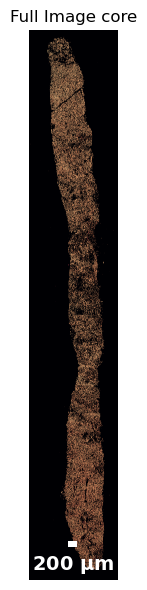

In [4]:
core_single_nuclei_lifetime_path = os.path.join(figure_4_dir, f'Leap{leap_num}_single_lifetime.tif')
plot_full_image_from_path(core_single_nuclei_lifetime_path, 'core', figure_size=(6,6))

### Resection

In [5]:
leap_num = '049'

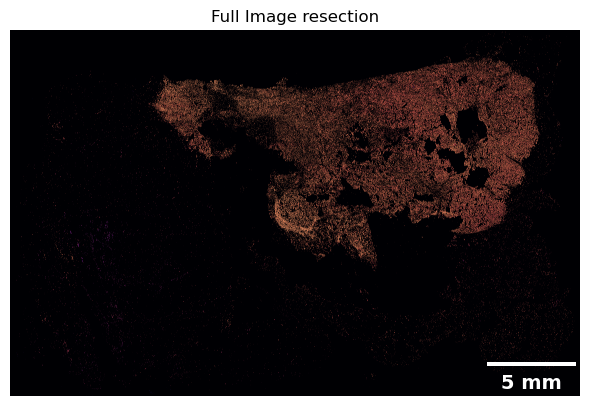

In [6]:
res_single_nuclei_lifetime_path = os.path.join(figure_4_dir, f'Leap{leap_num}_single_lifetime.tif')

plot_full_image_from_path(res_single_nuclei_lifetime_path, 'resection', figure_size=(6,6))

## Core - Resection analysis

#### Note on Data Preparation

The data used in this code was generated in the following notebook:

**`TNBC_FLIM/flim_analysis/resection analysis/core_resection_analysis.ipynb`**

Please make sure to run that notebook first to prepare the necessary data files before executing this one.

### Plot the distribution of median lifetime by core and resection

In [7]:
all_median_path = os.path.join(data_preparation_dir, 'median_lifetime_df_core_and_resection_samples.csv')
median_df_all_samples = pd.read_csv(all_median_path, dtype={'leap_ID': str})
core_non_responder_lifetime = median_df_all_samples[median_df_all_samples['sample_type']=='core_non_responder']['median_lifetime']
core_responder_lifetime = median_df_all_samples[median_df_all_samples['sample_type']=='core_responder']['median_lifetime']
resection_lifetime = median_df_all_samples[median_df_all_samples['sample_type']=='resection']['median_lifetime']

Comparison: core responder vs core non-responder
t-statistic: -1.447, P-value: 0.155

Comparison: core responder vs resection
t-statistic: -3.340, P-value: 0.002

Comparison: core non-responder vs resection
t-statistic: -1.700, P-value: 0.098



/home/reutme/TNBC-SPATIAL-CHROMATIN-COMPACTION/utils/plots_func.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category_col, y=col, data=df, order=order,
/home/reutme/TNBC-SPATIAL-CHROMATIN-COMPACTION/utils/plots_func.py:239: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=category_col, y=col, data=df, order=order,


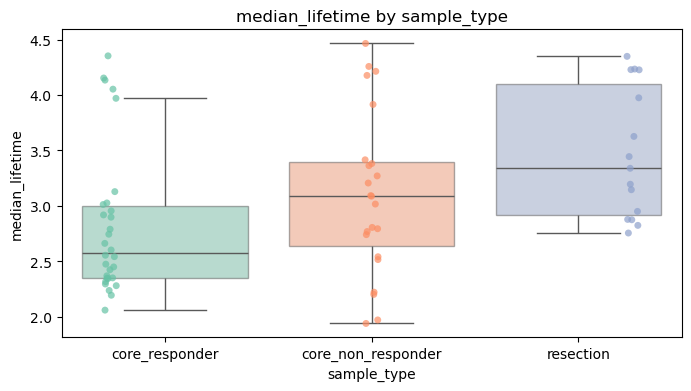

In [8]:
plt_fig = plot_boxplot_by_category(median_df_all_samples, 'median_lifetime', category_col='sample_type', figsize=(8,4))

save_file_name = "box_plot_median_lifetime_by_samples"
save_fig(figure_4_dir, save_file_name, 'pdf', plt_fig)

t_stat, t_p_value = ttest_ind(core_responder_lifetime, core_non_responder_lifetime, equal_var=False)  # Welch’s t-test
print(f"Comparison: core responder vs core non-responder\nt-statistic: {t_stat:.3f}, P-value: {t_p_value:.3f}\n")

t_stat, t_p_value = ttest_ind(core_responder_lifetime, resection_lifetime, equal_var=False)  # Welch’s t-test
print(f"Comparison: core responder vs resection\nt-statistic: {t_stat:.3f}, P-value: {t_p_value:.3f}\n")

t_stat, t_p_value = ttest_ind(core_non_responder_lifetime, resection_lifetime, equal_var=False)  # Welch’s t-test
print(f"Comparison: core non-responder vs resection\nt-statistic: {t_stat:.3f}, P-value: {t_p_value:.3f}\n")

### Plot core-resection matched pair rank - Median

In [3]:
median_core_resection_ranking_path = os.path.join(data_preparation_dir, 'core_resection_median_matched_pair_ranking.csv' )
median_ranking_df = pd.read_csv(median_core_resection_ranking_path, dtype={'leap_ID': str})
nr_rank_list = median_ranking_df['nr_rank'].values

Figure saved as pdf at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 4/MatchedPairRanksNR_median.pdf


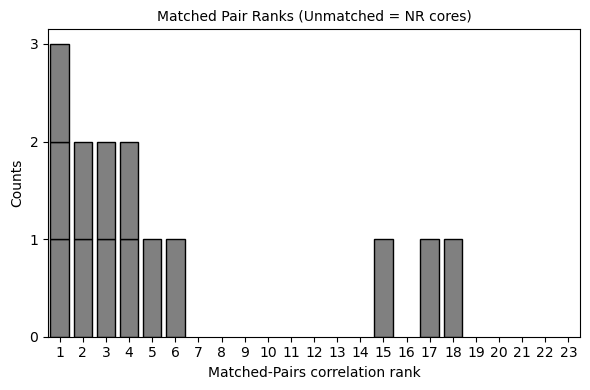

In [4]:
# Count occurrences of each rank
rank_to_indices = {}
for idx, rank in enumerate(nr_rank_list):
    rank_to_indices.setdefault(rank, []).append(idx)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot all matched pairs in blue
for rank, indices in rank_to_indices.items():
    for i, pair_idx in enumerate(indices):
        ax.bar(rank, 1, bottom=i, color='gray', edgecolor='black')

# Set labels and formatting
ax.set_title('Matched Pair Ranks (Unmatched = NR cores)', fontsize=10)
ax.set_xlabel('Matched-Pairs correlation rank')
ax.set_ylabel('Counts')
# ax.set_xticks(sorted(rank_to_indices.keys()))
# Force x-axis from 1 to 23
ax.set_xticks(np.arange(1, 24))  # 1 through 23
ax.set_xlim(0.5, 23.5)  # so bars are centered on ticks
ax.set_yticks(np.arange(0, max(len(v) for v in rank_to_indices.values()) + 1))

plt.tight_layout()

# Save
save_file_path = os.path.join(const.base_dir, 'figure_results', 'Figure 4')
save_file_name = "MatchedPairRanksNR_median"
save_fig(save_file_path, save_file_name, 'pdf', plt)
plt.show()

### Plot core-resection matched pair rank - Distribution

#### Euclidean

In [16]:
distri_core_resection_ranking_path = os.path.join(data_preparation_dir, 'core_resection_euclidean_distribution_matched_pair_ranking.csv' )
distri_ranking_df = pd.read_csv(distri_core_resection_ranking_path, dtype={'leap_ID': str})
nr_rank_list = distri_ranking_df['nr_rank'].values

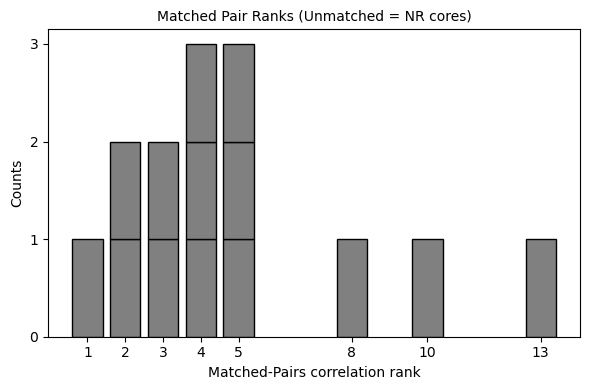

In [17]:
# Count occurrences of each rank
rank_to_indices = {}
for idx, rank in enumerate(nr_rank_list):
    rank_to_indices.setdefault(rank, []).append(idx)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot all matched pairs in blue
for rank, indices in rank_to_indices.items():
    for i, pair_idx in enumerate(indices):
        ax.bar(rank, 1, bottom=i, color='gray', edgecolor='black')

# Set labels and formatting
ax.set_title('Matched Pair Ranks (Unmatched = NR cores)', fontsize=10)
ax.set_xlabel('Matched-Pairs correlation rank')
ax.set_ylabel('Counts')
ax.set_xticks(sorted(rank_to_indices.keys()))
ax.set_yticks(np.arange(0, max(len(v) for v in rank_to_indices.values()) + 1))

plt.tight_layout()

# # Save
# save_file_path = os.path.join(const.base_dir, 'figure_results', 'Figure 4')
# save_file_name = "MatchedPairRanksNR_distribution"
# save_fig(save_file_path, save_file_name, 'pdf', plt)
plt.show()

#### Jensen-Shannon divergence

In [18]:
distri_core_resection_ranking_path = os.path.join(data_preparation_dir, 'core_resection_JS_distribution_matched_pair_ranking.csv' )
distri_ranking_df = pd.read_csv(distri_core_resection_ranking_path, dtype={'leap_ID': str})
nr_rank_list = distri_ranking_df['nr_rank'].values

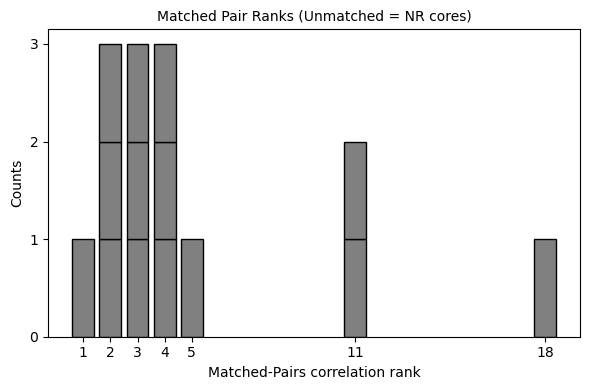

In [19]:
# Count occurrences of each rank
rank_to_indices = {}
for idx, rank in enumerate(nr_rank_list):
    rank_to_indices.setdefault(rank, []).append(idx)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot all matched pairs in blue
for rank, indices in rank_to_indices.items():
    for i, pair_idx in enumerate(indices):
        ax.bar(rank, 1, bottom=i, color='gray', edgecolor='black')

# Set labels and formatting
ax.set_title('Matched Pair Ranks (Unmatched = NR cores)', fontsize=10)
ax.set_xlabel('Matched-Pairs correlation rank')
ax.set_ylabel('Counts')
ax.set_xticks(sorted(rank_to_indices.keys()))
ax.set_yticks(np.arange(0, max(len(v) for v in rank_to_indices.values()) + 1))

plt.tight_layout()

# # Save
# save_file_path = os.path.join(const.base_dir, 'figure_results', 'Figure 4')
# save_file_name = "MatchedPairRanksNR_distribution"
# save_fig(save_file_path, save_file_name, 'pdf', plt)
plt.show()

#### Earth Mover’s Distance (EMD)

In [20]:
distri_core_resection_ranking_path = os.path.join(data_preparation_dir, 'core_resection_EMD_distribution_matched_pair_ranking.csv' )
distri_ranking_df = pd.read_csv(distri_core_resection_ranking_path, dtype={'leap_ID': str})
nr_rank_list = distri_ranking_df['nr_rank'].values

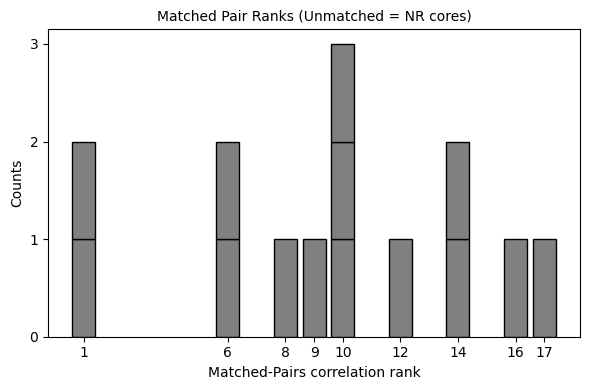

In [21]:
# Count occurrences of each rank
rank_to_indices = {}
for idx, rank in enumerate(nr_rank_list):
    rank_to_indices.setdefault(rank, []).append(idx)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot all matched pairs in blue
for rank, indices in rank_to_indices.items():
    for i, pair_idx in enumerate(indices):
        ax.bar(rank, 1, bottom=i, color='gray', edgecolor='black')

# Set labels and formatting
ax.set_title('Matched Pair Ranks (Unmatched = NR cores)', fontsize=10)
ax.set_xlabel('Matched-Pairs correlation rank')
ax.set_ylabel('Counts')
ax.set_xticks(sorted(rank_to_indices.keys()))
ax.set_yticks(np.arange(0, max(len(v) for v in rank_to_indices.values()) + 1))

plt.tight_layout()

# # Save
# save_file_path = os.path.join(const.base_dir, 'figure_results', 'Figure 4')
# save_file_name = "MatchedPairRanksNR_distribution"
# save_fig(save_file_path, save_file_name, 'pdf', plt)
plt.show()